## 집 근처 명소

In [2]:
import requests, json
import pandas as pd
from urllib.parse import quote
import folium

In [3]:
with open('keys/카카오apikey.txt') as file:
    kakao_key = file.read()

In [4]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = ['서울특별시 영등포구 양산로 지하 116','서울특별시 영등포구 당산로 123',
        '서울특별시 영등포구 당산로 지하 28','서울특별시 영등포구 국회대로 608',
        '서울특별시 영등포구 선유로 156','당산로16길 12']
url = []
for i in range(6):
    url.append(f'{base_url}?query={quote(addr[i])}')
url

['https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EC%96%91%EC%82%B0%EB%A1%9C%20%EC%A7%80%ED%95%98%20116',
 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EB%8B%B9%EC%82%B0%EB%A1%9C%20123',
 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EB%8B%B9%EC%82%B0%EB%A1%9C%20%EC%A7%80%ED%95%98%2028',
 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EA%B5%AD%ED%9A%8C%EB%8C%80%EB%A1%9C%20608',
 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EC%84%A0%EC%9C%A0%EB%A1%9C%20156',
 'https://dapi.kakao.com/v2/local/s

In [5]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [6]:
result = []
for i in range(6):
    result.append(requests.get(url[i], headers=header).json())
result


[{'documents': [{'address': {'address_name': '서울 영등포구 당산동3가 556-1',
     'b_code': '1156011300',
     'h_code': '1156055000',
     'main_address_no': '556',
     'mountain_yn': 'N',
     'region_1depth_name': '서울',
     'region_2depth_name': '영등포구',
     'region_3depth_h_name': '당산1동',
     'region_3depth_name': '당산동3가',
     'sub_address_no': '1',
     'x': '126.895289064995',
     'y': '37.5242266062117'},
    'address_name': '서울 영등포구 양산로 지하 116',
    'address_type': 'ROAD_ADDR',
    'road_address': {'address_name': '서울 영등포구 양산로 지하 116',
     'building_name': '영등포구청역',
     'main_building_no': '116',
     'region_1depth_name': '서울',
     'region_2depth_name': '영등포구',
     'region_3depth_name': '당산동3가',
     'road_name': '양산로',
     'sub_building_no': '',
     'underground_yn': 'Y',
     'x': '126.895289064995',
     'y': '37.5242266062117',
     'zone_no': '07264'},
    'x': '126.895289064995',
    'y': '37.5242266062117'}],
  'meta': {'is_end': True, 'pageable_count': 1, 'total_coun

In [7]:
for i in range(6):
    result[i]['documents'][0].keys()

In [8]:
lat = []
lng = []
for i in range(6):
    lat.append(float(result[i]['documents'][0]['y']))
    lng.append(float(result[i]['documents'][0]['x']))
lat, lng

([37.5242266062117,
  37.525963157053,
  37.5179214637526,
  37.5259893677858,
  37.5276672625119,
  37.5224166234114],
 [126.895289064995,
  126.896367130558,
  126.894763060556,
  126.901193281879,
  126.892185701933,
  126.897181094713])

In [9]:
names = '영등포구청역,영등포구청,문래역,서울영등포경찰서,코스트코 양평점,우리집'.split(',')

In [10]:
a = f'{base_url}?{url}&{names}'
a

"https://dapi.kakao.com/v2/local/search/address.json?['https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EC%96%91%EC%82%B0%EB%A1%9C%20%EC%A7%80%ED%95%98%20116', 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EB%8B%B9%EC%82%B0%EB%A1%9C%20123', 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EB%8B%B9%EC%82%B0%EB%A1%9C%20%EC%A7%80%ED%95%98%2028', 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EA%B5%AD%ED%9A%8C%EB%8C%80%EB%A1%9C%20608', 'https://dapi.kakao.com/v2/local/search/address.json?query=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%98%81%EB%93%B1%ED%8F%AC%EA%B5%AC%20%EC%84%A0%EC%9C%A0%EB%

In [11]:
df = pd.DataFrame({
    '이름': names, '주소': addr
})
df

,이름,주소
0,영등포구청역,서울특별시 영등포구 양산로 지하 116
1,영등포구청,서울특별시 영등포구 당산로 123
2,문래역,서울특별시 영등포구 당산로 지하 28
3,서울영등포경찰서,서울특별시 영등포구 국회대로 608
4,코스트코 양평점,서울특별시 영등포구 선유로 156
5,우리집,당산로16길 12


In [12]:
df.to_csv('data/집근처 명소.csv', index=False)
pd.read_csv('data/집근처 명소.csv')

,이름,주소
0,영등포구청역,서울특별시 영등포구 양산로 지하 116
1,영등포구청,서울특별시 영등포구 당산로 123
2,문래역,서울특별시 영등포구 당산로 지하 28
3,서울영등포경찰서,서울특별시 영등포구 국회대로 608
4,코스트코 양평점,서울특별시 영등포구 선유로 156
5,우리집,당산로16길 12


In [13]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df["주소"][i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [14]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,영등포구청역,서울특별시 영등포구 양산로 지하 116,37.524227,126.895289
1,영등포구청,서울특별시 영등포구 당산로 123,37.525963,126.896367
2,문래역,서울특별시 영등포구 당산로 지하 28,37.517921,126.894763
3,서울영등포경찰서,서울특별시 영등포구 국회대로 608,37.525989,126.901193
4,코스트코 양평점,서울특별시 영등포구 선유로 156,37.527667,126.892186
5,우리집,당산로16길 12,37.522417,126.897181


In [15]:
picture = 'data/영등포구청역.jpg,data/영등포구.jpg,data/문래역.jpg,data/경찰.jpg,data/코스트코.jpg,data/pushpin.png'.split(',')
picture

['data/영등포구청역.jpg',
 'data/영등포구.jpg',
 'data/문래역.jpg',
 'data/경찰.jpg',
 'data/코스트코.jpg',
 'data/pushpin.png']


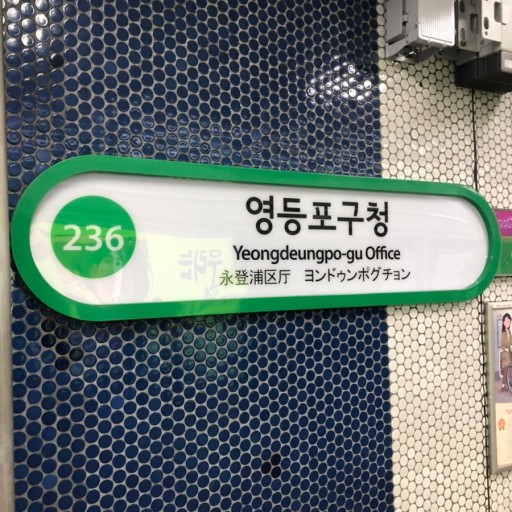
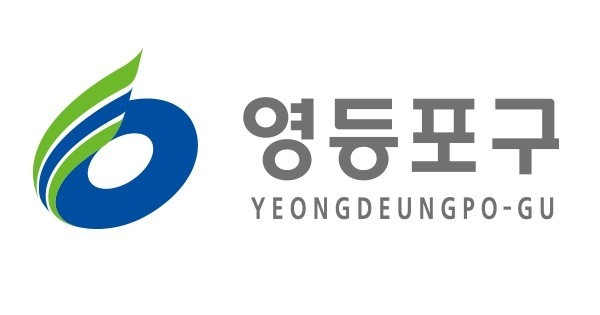
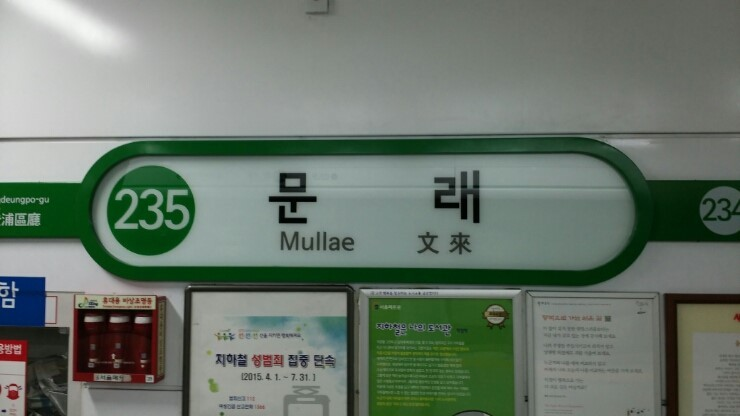
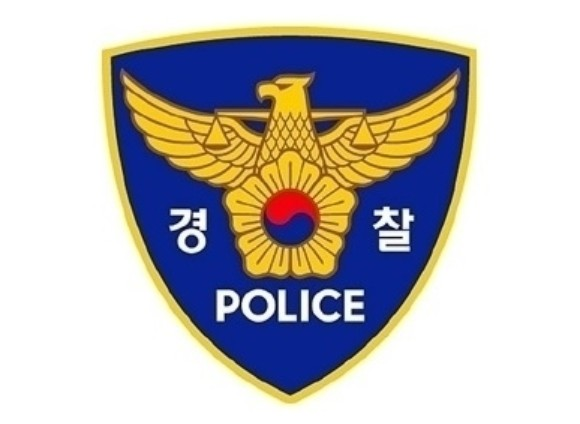
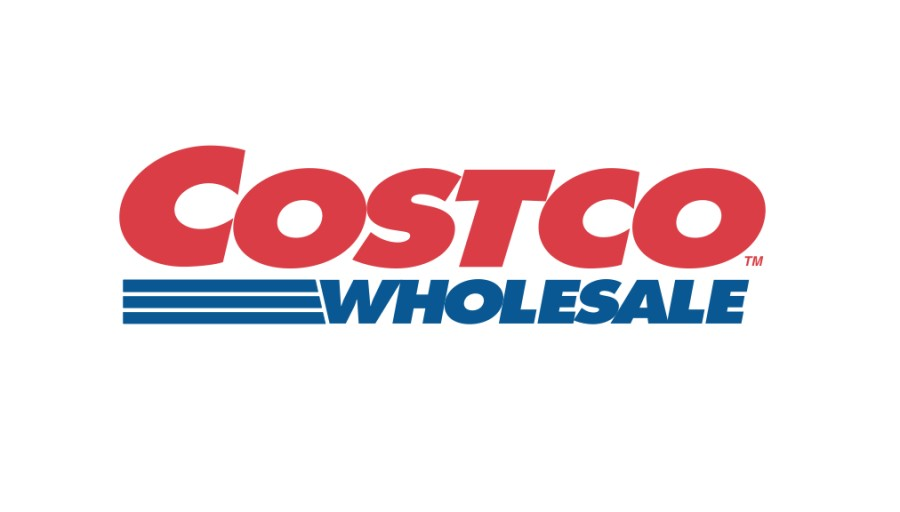
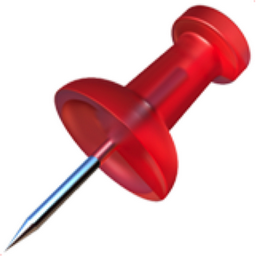

In [17]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=14)
for i in df.index:
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        tooltip=df.이름[i],
        popup=folium.Popup(df.주소[i], max_width=200),
        icon=folium.CustomIcon(picture[i], icon_size=(30,30)),
    ).add_to(map)
    
    folium.map.Marker(
        location=[df.위도[i], df.경도[i]],
        icon = folium.DivIcon(icon_size=(80,20), icon_anchor=(20,0),
                    html=f'<span style="font-size: 7pt">{df.이름[i]}</span>')
    ).add_to(map)
    
title_html = '<h3 align="center" style="font-size:20px">집 근처 명소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map